# Datawhale 智慧海洋建设-Task2 数据分析

此部分为智慧海洋建设竞赛的数据分析模块，通过数据分析，可以熟悉数据，为后面的特征工程做准备，欢迎大家后续多多交流。

赛题：智慧海洋建设

数据分析的目的:

- EDA的主要价值在于熟悉整个数据集的基本情况(缺失值、异常值)，来确定所获得数据集可以用于接下来的机器学习或者深度学习使用。


- 了解特征之间的相关性、分布，以及特征与预测值之间的关系。


- 为进行特征工程提供理论依据。

项目地址：https://github.com/datawhalechina/team-learning-data-mining/tree/master/wisdomOcean


比赛地址：https://tianchi.aliyun.com/competition/entrance/231768/introduction?spm=5176.12281957.1004.8.4ac63eafE1rwsY

## 2.1 学习目标

1. 学习如何对数据集整体概况进行分析，包括数据集的基本情况(缺失值、异常值)


2. 学习了解变量之间的相互关系、变量与预测值之间的存在关系。


3. 完成相应学习打卡任务

## 2.2 内容介绍

1. 数据总体了解
    - 读取数据集并了解数据集的大小，原始特征维度；
    - 通过info了解数据类型；
    - 粗略查看数据集中各特征的基本统计量
2. 缺失值和唯一值
    - 查看数据缺失值情况
    - 查看唯一值情况
3. 数据特性和特征分布
    - 三类渔船轨迹的可视化
    - 坐标序列可视化
    - 三类渔船速度和方向序列可视化
    - 三类渔船速度和方向的数据分布
4. 总结

## 2.3 代码示例

### 2.3.1 载入各种数据科学以及可视化库

以下库都是pip install安装，有特殊情况我会单独说明  例如 pip install pandas -i https://pypi.tuna.tsinghua.edu.cn/simple

In [1]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### 2.3.2 载入其它相关的包

In [2]:
import sys  
sys.path.insert(0, './')

# 把读取所有数据的函数放在单独的python文件中，是为了解决多线程问题在jupyter notebook无法运行的问题
import read_all_data

In [3]:
from tqdm import tqdm
import multiprocessing as mp
import os
import pickle
import random


### 说明：

本次数据分析探索，尤其可视化部分均选取某些特定变量进行了举例，所以它只是一个方法的展示而不是整个赛题数据分析的解决方案。

### 2.3.3 定义加载和存储数据的函数

In [4]:
class Load_Save_Data():
    def __init__(self,file_name=None):
        self.filename = file_name

    def load_data(self,Path=None):
        if Path is None:
            assert self.filename is not None,"Invalid Path...."
        else:
            self.filename = Path
        with open(self.filename,"wb") as f:
            data = pickle.load(f)
        return data

    def save_data(self,data,path):
        if path is None:
            assert self.filename is not None,"Invalid path...."
        else:
            self.filename = path
        with open(self.filename,"wb") as f:
            pickle.dump(data,f)

### 2.3.4 读取数据

In [7]:
# 定义读取数据的函数
def read_data(Path,Kind=""):
    """
    :param Path:待读取数据的存放路径
    :param Kind:'train' of 'test'
    """

    # 替换成数据存放的路径
    filenames = os.listdir(Path)
    print("\n@Read Data From"+Path+".........................")
    with mp.Pool(processes=mp.cpu_count()) as pool:
        data_total = list(tqdm(pool.map(read_all_data.read_train_file if Kind == "train" else 
                                        read_all_data.read_test_file,filenames),total=len(filenames)))
    print("\n@End Read total Data............................")
    load_save = Load_Save_Data()
    if Kind == "train":
        load_save.save_data(data_total,"./data/total_data.pkl")
    return data_total

In [8]:
# 训练数据读取

# 存放数据的绝对路径
train_path = "./hy_round1_train_20200102/"
data_train = read_data(train_path,Kind="train")
data_train = pd.concat(data_train)

# 测试数据读取

# 存放数据的绝对路径
test_path = "./hy_round1_testA_20200102/"
data_test = read_data(test_path,Kind="test")
data_test = pd.concat(data_test)


@Read Data From./hy_round1_train_20200102/.........................

@End Read total Data............................

@Read Data From./hy_round1_testA_20200102/.........................

@End Read total Data............................


100%|██████████| 2000/2000 [00:00<00:00, 2507055.59it/s]


### 2.3.5 总体了解数据

#### 查看数据集的样本个数和原始特征维度

In [9]:
data_test.shape

(782378, 6)

In [10]:
data_train.shape

(2699638, 7)

In [16]:
data_train.columns

Index(['Unnamed: 0', 'ID', 'lat', 'lon', 'speed', 'direction', 'time', 'type',
       'time_array', 'dist_array', 'coord_speed'],
      dtype='object')

查看一下具体的列名，赛题理解部分已经给出具体的特征含义，这里方便阅读再给一下

- 渔船ID：渔船的唯一识别，结果文件以此ID为标识
- x：渔船在平面坐标系下的x轴坐标
- y：渔船在平面坐标系下的y轴坐标
- 速度：渔船当前时刻的航速，单位节
- 方向：渔船当前时刻的航首向，单位度
- time：数据上报时刻，单位月日 时:分
- type：渔船label，作业类型

In [11]:
pd.options.display.max_info_rows = 2699639
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2699638 entries, 0 to 365
Data columns (total 7 columns):
渔船ID    2699638 non-null int64
x       2699638 non-null float64
y       2699638 non-null float64
速度      2699638 non-null float64
方向      2699638 non-null int64
time    2699638 non-null object
type    2699638 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 164.8+ MB


In [12]:
data_train.describe([0.01,0.025,0.05,0.5,0.75,0.9,0.99])

,渔船ID,x,y,速度,方向
count,2.699638e+06,2.699638e+06,2.699638e+06,2.699638e+06,2.699638e+06
mean,3.496035e+03,6.277243e+06,5.271190e+06,1.784449e+00,1.151533e+02
std,2.020781e+03,2.698065e+05,2.544160e+05,2.478862e+00,1.168515e+02
min,0.000000e+00,5.000250e+06,3.345433e+06,0.000000e+00,0.000000e+00
1%,6.900000e+01,5.258862e+06,4.618927e+06,0.000000e+00,0.000000e+00
2.5%,1.710000e+02,5.817836e+06,4.920685e+06,0.000000e+00,0.000000e+00
5%,3.470000e+02,6.024286e+06,4.985102e+06,0.000000e+00,0.000000e+00
50%,3.502000e+03,6.246522e+06,5.229463e+06,3.200000e-01,8.100000e+01
75%,5.243000e+03,6.365916e+06,5.379267e+06,3.290000e+00,2.170000e+02
90%,6.290000e+03,6.592496e+06,5.602273e+06,4.910000e+00,2.930000e+02


In [13]:
data_train.head(3).append(data_train.tail(3))

,渔船ID,x,y,速度,方向,time,type
0,0,6.152038e+06,5.124873e+06,2.59,102,1110 11:58:19,拖网
1,0,6.151230e+06,5.125218e+06,2.70,113,1110 11:48:19,拖网
2,0,6.150421e+06,5.125563e+06,2.70,116,1110 11:38:19,拖网
363,999,6.138413e+06,5.162715e+06,0.32,0,1031 12:28:01,拖网
364,999,6.138413e+06,5.162715e+06,0.32,0,1031 12:18:00,拖网
365,999,6.138413e+06,5.162715e+06,0.11,294,1031 12:07:59,拖网


### 2.3.6查看数据集中特征缺失值、唯一值等

查看缺失值

In [14]:
print(f'There are {data_train.isnull().any().sum()} columns in train dataset with missing values.')

There are 0 columns in train dataset with missing values.


查看训练集测试集中特征属性只有一值的特征

In [15]:
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <= 1]

In [16]:
one_value_fea_test = [col for col in data_test.columns if data_test[col].nunique() <= 1]

In [17]:
one_value_fea

[]

In [18]:
one_value_fea_test

[]

In [19]:
print(f'There are {len(one_value_fea)} columns in train dataset with one unique value.')
print(f'There are {len(one_value_fea_test)} columns in test dataset with one unique value.')

There are 0 columns in train dataset with one unique value.
There are 0 columns in test dataset with one unique value.


## 总结:

6列特征中0列有缺少数据，不存在有唯一值的列，有连续特征和分类特征

## 2.4 数据特性和特征分布

### 2.4.1 三类渔船轨迹可视化

In [37]:
# 把训练集的所有数据,根据类别存放到不同的数据文件中
def get_diff_data():
    Path = "./data/total_data.pkl"
    with open(Path,"rb") as f:
        total_data = pickle.load(f)

    load_save = Load_Save_Data()

    kind_data = ["刺网","围网","拖网"]
    file_names = ["ciwang_data.pkl","weiwang_data.pkl","tuowang_data.pkl"]
    for i,datax in enumerate(kind_data):
        data_type =  [data for data in total_data if data["type"].unique()[0] == datax]
        load_save.save_data(data_type,"./data/" + file_names[i])

In [28]:
get_diff_data()

In [31]:
# 从存放某个轨迹类别的数据文件中，随机读取某个渔船的数据
def get_random_one_traj(type=None):
    """
    :param type:"ciwang","weiwang" or "tuowang"
    """
    
    np.random.seed(10)
    path = "./data/"
    with open(path + type + ".pkl","rb") as f1:
        data = pickle.load(f1)
    length = len(data)
    index = np.random.choice(length)
    return data[index]

In [32]:
# 分别从三个类别的数据文件中，随机读取某三个渔船的数据
def get_random_three_traj(type=None):
    """
    :param type:"ciwang","weiwang" or "tuowang"
    """
    
    random.seed(10)
    path = "./data/"
    with open(path + type + ".pkl", "rb") as f:
        data = pickle.load(f)
    data_arrange = np.arange(len(data)).tolist()
    index = random.sample(data_arrange,3)
    return data[index[0]],data[index[1]],data[index[2]]

In [56]:
# 每个类别中随机三个渔船的轨迹进行可视化
def visualize_three_traj():
    fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(20,15))
    plt.subplots_adjust(wspace=0.2,hspace=0.2)
    # 对于每一个类别，随机选出刺网的三条轨迹进行可视化
    lables = ["ciwang","weiwang","tuowang"]
    for i,file_type in tqdm(enumerate(["ciwang_data","weiwang_data","tuowang_data"])):
        data1, data2, data3 = get_random_three_traj(type=file_type)
        for j, datax in enumerate([data1, data2, data3]):
            x_data = datax["x"].loc[-1:].values
            y_data = datax["y"].loc[-1:].values
            axes[i][j - 1].scatter(x_data[0], y_data[0], label="start", c="red", s=10, marker="8")
            axes[i][j - 1].plot(x_data, y_data, label=lables[i])
            axes[i][j - 1].scatter(x_data[len(x_data) - 1], y_data[len(y_data) - 1], label="end", c="green", s=10,
                                   marker="v")
            axes[i][j - 1].grid(alpha=2)
            axes[i][j - 1].legend(loc="best")

    plt.show()

In [60]:
path = "./data/"
with open("./data/ciwang_data" + ".pkl", "rb") as f:
    data = pickle.load(f)

data

[     渔船ID             x             y    速度   方向           time type
 0    1007  6.180241e+06  5.192755e+06  0.22    0  1120 23:48:26   刺网
 1    1007  6.180241e+06  5.192755e+06  0.22    0  1120 23:38:23   刺网
 2    1007  6.180241e+06  5.192755e+06  0.11  113  1120 23:28:25   刺网
 3    1007  6.180241e+06  5.192755e+06  0.00    0  1120 23:18:25   刺网
 4    1007  6.180241e+06  5.192755e+06  0.00  127  1120 23:08:24   刺网
 ..    ...           ...           ...   ...  ...            ...  ...
 402  1007  6.180342e+06  5.192753e+06  0.22  251  1118 00:43:33   刺网
 403  1007  6.180342e+06  5.192753e+06  0.00    3  1118 00:33:32   刺网
 404  1007  6.180342e+06  5.192753e+06  0.11    0  1118 00:23:32   刺网
 405  1007  6.180342e+06  5.192753e+06  0.11    0  1118 00:13:31   刺网
 406  1007  6.180342e+06  5.192753e+06  0.32  188  1118 00:03:32   刺网
 
 [407 rows x 7 columns],
      渔船ID             x             y    速度   方向           time type
 0    1010  6.165394e+06  5.202445e+06  0.11    0  1123 23:58:1

3it [00:05,  1.68s/it]


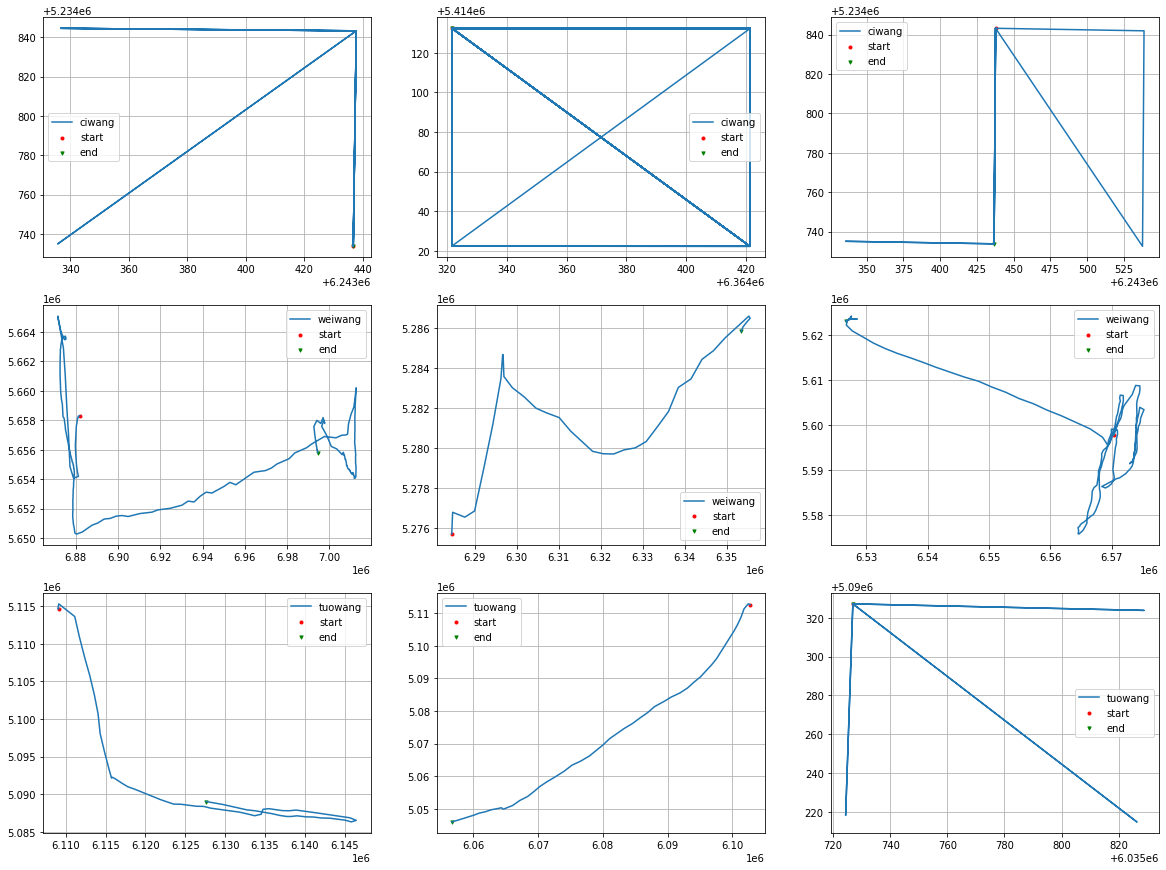

In [42]:
visualize_three_traj()

#### 总结:

1. 可以看到不同轨迹虽然有不同的变化，但是仍然不具有很强的区分性。
    - 刺网的轨迹偏向于具有规则多边形的情形。
    - 围网的部分轨迹偏向于围城一个圈的情形。
    - 拖网的轨迹偏向于点到点，没有拐角的情形。
    - 整体上来说，不同类别的轨迹仍然不具有很强的区别分性。

2. 通过取不同的随机数，发现存在异常轨迹，轨迹中只存在几个点。

### 2.4.2 坐标序列可视化

In [43]:
# 随机选取某条数据，观察x坐标序列和y坐标序列的变化情况
def visualize_one_traj_x_y():
    fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(10,8))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

    data1 = get_random_one_traj(type="weiwang_data")
    x = data1["x"].loc[-1:]
    x = x / 10000
    
    y = data1["y"].loc[-1:]
    y = y / 10000

    arr1 = np.arange(len(x))
    arr2 = np.arange(len(y))

    axes[0].plot(arr1,x,label="x")
    axes[1].plot(arr2,y,label="y")
    axes[0].grid(alpha=3)
    axes[0].legend(loc="best")
    axes[1].grid(alpha=3)
    axes[1].legend(loc="best")
    plt.show()

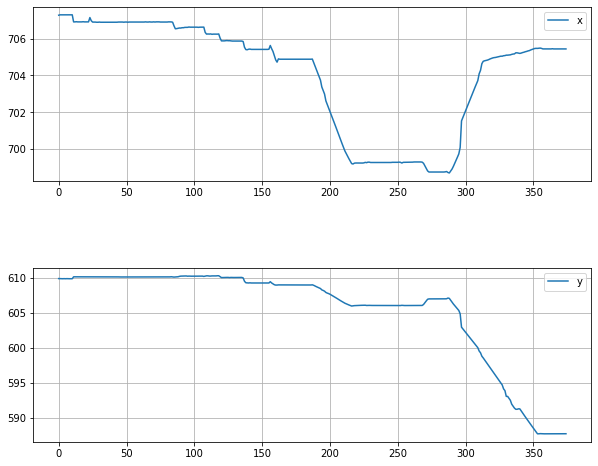

In [44]:
visualize_one_traj_x_y()

#### 总结:

1.  通过对坐标x和坐标y序列的可视化，发现两个序列存在同时不变的情况，也就是速度数据一直在该序列中一直接近于0，因此可以判断存在POI点。

### 2.4.3 三类渔船速度和方向可视化

In [45]:
# 每类轨迹，随机选取某个渔船，可视化速度序列和方向序列
def visualize_three_traj_speed_direction():
    fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(20,15))
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    # 随机选出刺网的三条轨迹进行可视化
    file_types = ["ciwang_data","weiwang_data","tuowang_data"]
    speed_types = ["ciwang_speed","weiwang_speed","tuowang_speed"]
    doirections = ["ciwang_direction","weiwang_direction","tuowang_direction"]
    colors = ['pink', 'lightblue', 'lightgreen']
    for i,file_name in tqdm(enumerate(file_types)):
        datax = get_random_one_traj(type=file_name)
        x_data = datax["速度"].loc[-1:].values
        y_data = datax["方向"].loc[-1:].values
        axes[i][0].plot(range(len(x_data)), x_data, label=speed_types[i], color=colors[i])
        axes[i][0].grid(alpha=2)
        axes[i][0].legend(loc="best")
        axes[i][1].plot(range(len(y_data)), y_data, label=doirections[i], color=colors[i])
        axes[i][1].grid(alpha=2)
        axes[i][1].legend(loc="best")

    plt.show()

3it [00:04,  1.61s/it]


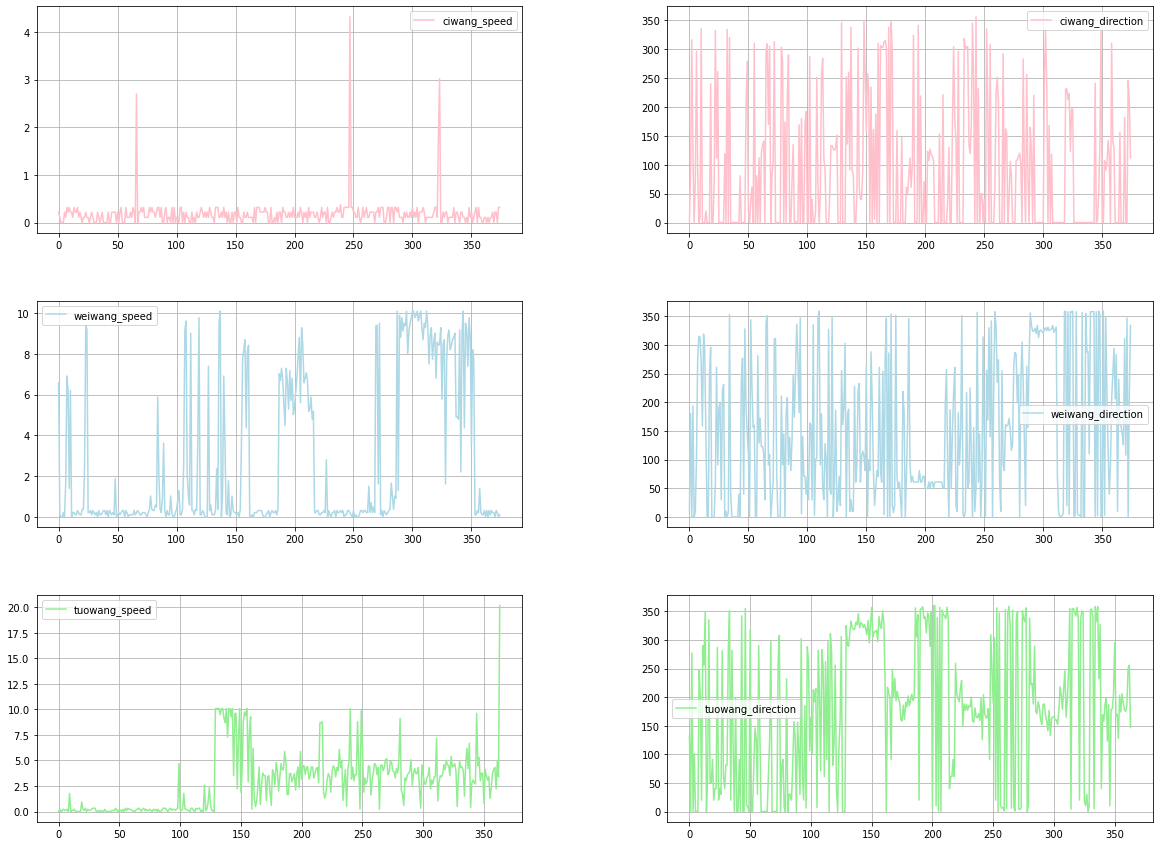

In [46]:
visualize_three_traj_speed_direction()

### 总结:

1. 不同轨迹速度的数据分布，均存在连续的低值，因此强化了对POI点存在的判断。

2. 每个类别的渔船方向变化很快，可以判定为渔船在海上漂泊造成，因此此特征对于类别的判断不具有很强的区分性。

### 2.4.4 三类渔船速度和方向的数据分布

In [47]:
# 对某一特征进行数据统计
def get_data_cummulation(type=None,path=None,kind=None,columns=None):
    """
    :param type:"ciwang","weiwang" or "tuowang"
    :param path:存放数据路径
    :param kind: '速度' or  '方向'
    :param columns:与kind对应，'speed' or 'direction'
    """
    
    data_dict = dict()
    with open(path + type+".pkl","rb") as file:
        data_list = pickle.load(file)
    for datax in tqdm(data_list):
        data = datax[kind].values
        for speed in data:
            data_dict.setdefault(speed,0)
            data_dict[speed] += 1
    data_dict = dict(sorted(data_dict.items(),key=lambda x:x[0],reverse=False))
    data_df = pd.DataFrame.from_dict(data_dict,columns=[columns],orient="index")
    return data_df

In [49]:
# 分别得到速度和方向的分布数据
def get_speed_and_direction_distribution_data(type=None):
    """
    :param type:"ciwang","weiwang" or "tuowang"
    """
    
    path = "./data/"
    data_speed_df = get_data_cummulation(type=type, path=path,kind="速度",columns="speed")
    data_direction_df = get_data_cummulation(type=type,path=path,kind="方向",columns="direction")
    return data_speed_df,data_direction_df

In [50]:
# 可视化速度和方向的数据分布
df_speeds = []
df_directions = []


def plot_speed_direction1_distribution():
    plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    plt.subplots_adjust(wspace=0.3, hspace=0.5)

    file_types = ["ciwang_data", "weiwang_data", "tuowang_data"]
    lables = ["target==cw", "target==ww", "target==tw"]
    colors = ["red", "green", "blue"]

    for i, filenames in enumerate(file_types):
        df11, df21 = get_speed_and_direction_distribution_data(file_types[i])
        plt.subplot(1,2,1)
        ax1 = sns.kdeplot(df11["speed"].values / 1000000, color=colors[i],shade=True)
        plt.subplot(1,2,2)
        ax3 = sns.kdeplot(df21["direction"].values / 1000000, color=colors[i],shade=True)
        df_speeds.append(df11)
        df_directions.append(df21)
    ax1.legend(lables)
    ax1.set_xlabel("Speed")
    ax3.set_xlabel("Direction")
    ax3.legend(lables)
    plt.show()

100%|██████████| 4361/4361 [00:01<00:00, 4312.05it/s]


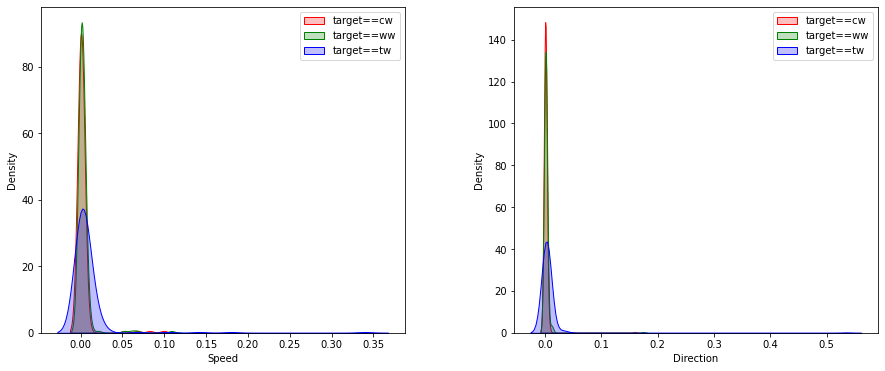

In [51]:
plot_speed_direction1_distribution()

In [52]:
# 使用分位图对速度和方向的数据分布进行可视化
def plot_speed_direction2_distribution():
    fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    colors_box = ['pink', 'lightblue', 'lightgreen']

    bplot1 = axes[0].boxplot([df_speeds[0]["speed"].values,df_speeds[1]["speed"].values,df_speeds[2]["speed"].values]
                       , vert=True
                       , patch_artist=True
                       , labels=["cw", "ww", "tw"])
    bplot2 = axes[1].boxplot([df_directions[0]["direction"].values, df_directions[1]["direction"].values, df_directions[2]["direction"].values]
                       , vert=True
                       , patch_artist=True
                       , labels=["cw", "ww", "tw"])

    for blpot in (bplot1,bplot2):
        for patch,color in zip(blpot["boxes"],colors_box):
            patch.set_facecolor(color)

    axes[0].set_title("speed")
    axes[1].set_title("direction")
    plt.show()

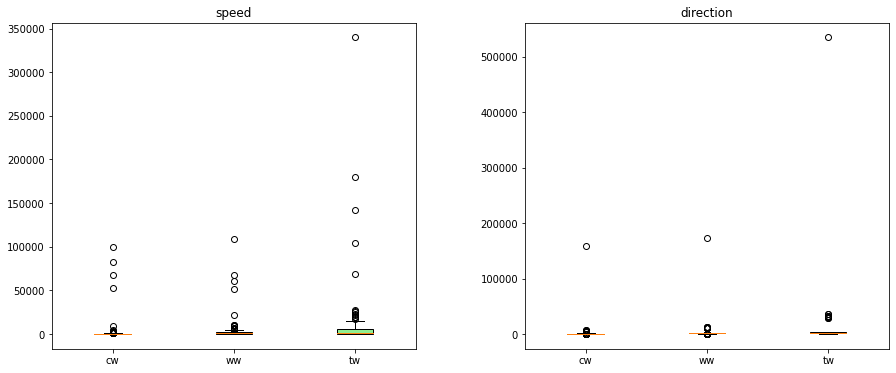

In [53]:
plot_speed_direction2_distribution()

#### 总结

1. 无论是分布图，还是分位图，都可以发现不同类型轨迹的速度数据分布存在很大的差异。
2. 无论是分布图，还是分位图，都可以发现不同类型轨迹的方向数据分布差异不是特别明显。

## 总结

通过以上的数据分析，我们可以得到以下结论

1. 每个特征中不存在缺失值和唯一值。


2. 存在异常轨迹，该轨迹只含有几个点。


3. 虽然不同类别的轨迹有不同的变化倾向，但是整体来说，不具有很强的区分性。


4. 通过对坐标序列的分析，发现存在POI点。


5. 通过对不同类别的速度数据分布可视化，发现速度具有很强的区分性。


6. 通过对不同类别的方向数据分布可视化，发现方向的区分性不是特别强。

## 作业:

1. 请尝试用Task1中的异常处理代码对异常数据进行删除之后，再分别绘制速度和方向的数据分布图、速度和方向的分位图。

2.在前面我们已经进行了绘制速度和方向的数据分布图。由Task1的keperl.gl可知，不同地理位置和船舶类型的相关性较大。请尝试将相同类型船舶的轨迹给拼接起来并绘制经度和纬度的总体分布特征。之前由liu123的航空母舰队伍绘制的分布图如下所示。

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210410211413901.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80NDEzMzMyNw==,size_16,color_FFFFFF,t_70)


![在这里插入图片描述](https://img-blog.csdnimg.cn/202104102114535.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80NDEzMzMyNw==,size_16,color_FFFFFF,t_70)



## 参考文献

1. https://tianchi.aliyun.com/forum/postDetail?postId=110932 